In [1]:
library(lmerTest)
library(ggplot2)
options(width=150)

Loading required package: Matrix
Loading required package: lme4

Attaching package: ‘lmerTest’

The following object is masked from ‘package:lme4’:

    lmer

The following object is masked from ‘package:stats’:

    step



In [2]:
mydata = read.csv("/Users/mspits/Dropbox (Aguirre-Brainard Lab)/MELA_analysis/NullingPopulationData/xLMSTabulatedAbsorbance/LMS_AllNullingContrast_LMSFromTabulatedAbsorbance.csv")
mydata$Run <- factor(mydata$Run)
mydata$Run <- gsub('1', 'Run 1', mydata$Run)
mydata$Run <- gsub('2', 'Run 2', mydata$Run)
mydata$Arm <- factor(mydata$Arm)
mydata$Arm <- gsub('1', 'Positive', mydata$Arm)
mydata$Arm <- gsub('2', 'Negative', mydata$Arm)
mydata$Group <- factor(mydata$Group)
mydata$Group <- gsub('NullingPopulationData18To24', '18-24 yrs', mydata$Group)
mydata$Group <- gsub('NullingPopulationDataFork2', '25-40 yrs', mydata$Group)

In [3]:
testLMinusM <- lmer(L.M.null ~ (1 | Subject) + Group + Arm + Run, data=mydata)
lsmeans(testLMinusM)
difflsmeans(testLMinusM)
fileName <- '/Users/mspits/Dropbox (Aguirre-Brainard Lab)/MELA_analysis/NullingPopulationData/xLMSTabulatedAbsorbance/LMS_LMinusMNull_ANOVA_LMSFromTabulatedAbsorbance.csv'
capture.output(lsmeans(testLMinusM), file=fileName)
capture.output(difflsmeans(testLMinusM), file=fileName, append=TRUE)

Least Squares Means table:
                 Group  Arm  Run Estimate Standard Error   DF t-value Lower CI Upper CI p-value   
Group  18-24 yrs   1.0   NA   NA   0.0029         0.0020 30.0    1.43  -0.0013   0.0071   0.164   
Group  25-40 yrs   2.0   NA   NA   0.0047         0.0020 30.0    2.32   0.0006   0.0089   0.027 * 
Arm  Negative       NA  1.0   NA   0.0027         0.0017 56.1    1.59  -0.0007   0.0061   0.117   
Arm  Positive       NA  2.0   NA   0.0049         0.0017 56.1    2.88   0.0015   0.0083   0.006 **
Run  Run 1          NA   NA  1.0   0.0035         0.0017 56.1    2.04   0.0001   0.0069   0.046 * 
Run  Run 2          NA   NA  2.0   0.0042         0.0017 56.1    2.44   0.0007   0.0076   0.018 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Differences of LSMEANS:
                            Estimate Standard Error DF t-value Lower CI Upper CI p-value
Group 18-24 yrs - 25-40 yrs        0         0.0029 30   -0.63  -0.0077   0.0041     0.5
Arm Negative - Positive            0         0.0018 94   -1.21  -0.0058   0.0014     0.2
Run Run 1 - Run 2                  0         0.0018 94   -0.37  -0.0043   0.0030     0.7

In [4]:
testS <- lmer(S.null ~ (1 | Subject) + Group + Arm + Run, data=mydata)
lsmeans(testS)
difflsmeans(testS)
fileName <- '/Users/mspits/Dropbox (Aguirre-Brainard Lab)/MELA_analysis/NullingPopulationData/xLMSTabulatedAbsorbance/LMS_SNull_ANOVA_LMSFromTabulatedAbsorbance.csv'
capture.output(lsmeans(testS), file=fileName)
capture.output(difflsmeans(testS), file=fileName, append=TRUE)

Least Squares Means table:
                 Group Arm Run Estimate Standard Error  DF t-value Lower CI Upper CI p-value    
Group  18-24 yrs     1  NA  NA  -0.0477         0.0052 124   -9.09  -0.0580  -0.0373  <2e-16 ***
Group  25-40 yrs     2  NA  NA  -0.0536         0.0052 124  -10.22  -0.0640  -0.0432  <2e-16 ***
Arm  Negative       NA   1  NA  -0.0650         0.0052 124  -12.40  -0.0754  -0.0546  <2e-16 ***
Arm  Positive       NA   2  NA  -0.0362         0.0052 124   -6.91  -0.0466  -0.0259  <2e-16 ***
Run  Run 1          NA  NA   1  -0.0562         0.0052 124  -10.73  -0.0666  -0.0459  <2e-16 ***
Run  Run 2          NA  NA   2  -0.0450         0.0052 124   -8.59  -0.0554  -0.0346  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Differences of LSMEANS:
                            Estimate Standard Error  DF t-value Lower CI Upper CI p-value    
Group 18-24 yrs - 25-40 yrs        0         0.0074 124    0.80  -0.0088   0.0206     0.4    
Arm Negative - Positive            0         0.0074 124   -3.88  -0.0434  -0.0141   2e-04 ***
Run Run 1 - Run 2                  0         0.0074 124   -1.52  -0.0259   0.0034     0.1    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Saving 7 x 7 in image


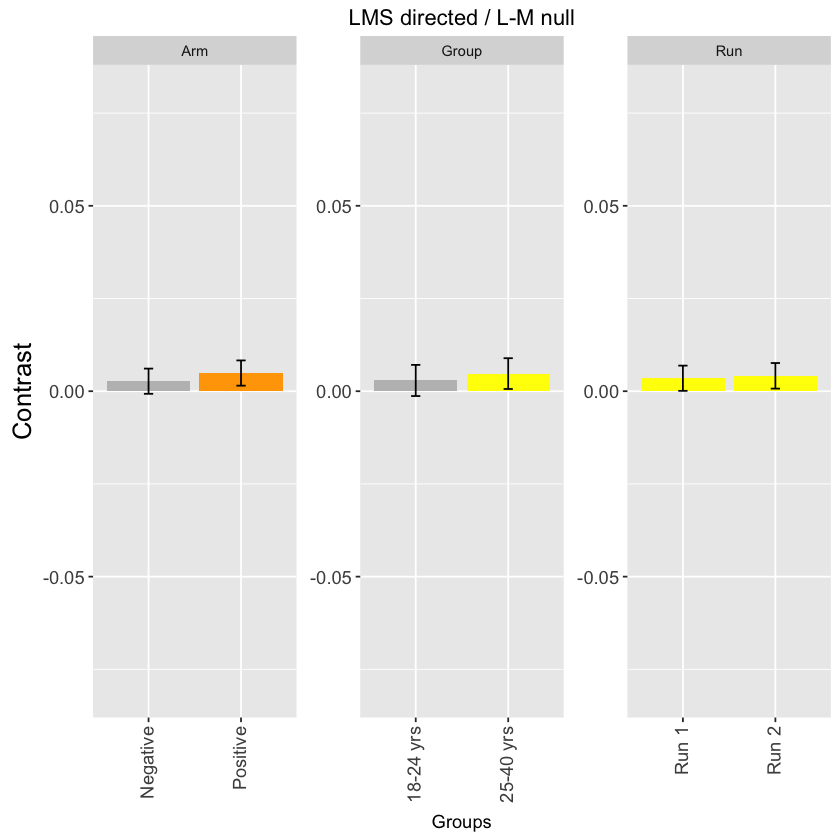

Saving 7 x 7 in image


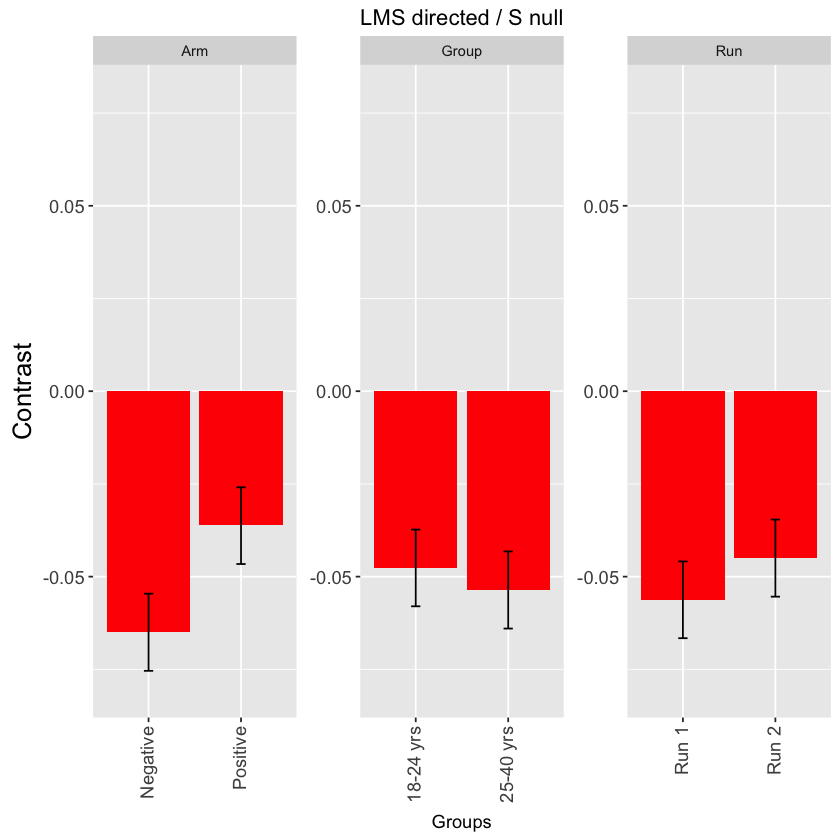

In [5]:
b2 <- plot(lsmeans(testLMinusM))
b2 + ggtitle("LMS directed / L-M null") + coord_cartesian(ylim=c(-0.08, 0.08)) + ylab('Contrast') + xlab('Groups') + theme(legend.position="none")
ggsave(file='/Users/mspits/Dropbox (Aguirre-Brainard Lab)/MELA_analysis/NullingPopulationData/xLMSTabulatedAbsorbance/LMS_LMinusMNull_ANOVA_LMSFromTabulatedAbsorbance.pdf')
b3 <- plot(lsmeans(testS))
b3 + ggtitle("LMS directed / S null") + coord_cartesian(ylim=c(-0.08, 0.08)) + ylab('Contrast') + xlab('Groups') + theme(legend.position="none")
ggsave(file='/Users/mspits/Dropbox (Aguirre-Brainard Lab)/MELA_analysis/NullingPopulationData/xLMSTabulatedAbsorbance/LMS_SNull_ANOVA_LMSFromTabulatedAbsorbance.pdf')

Saving 7 x 7 in image


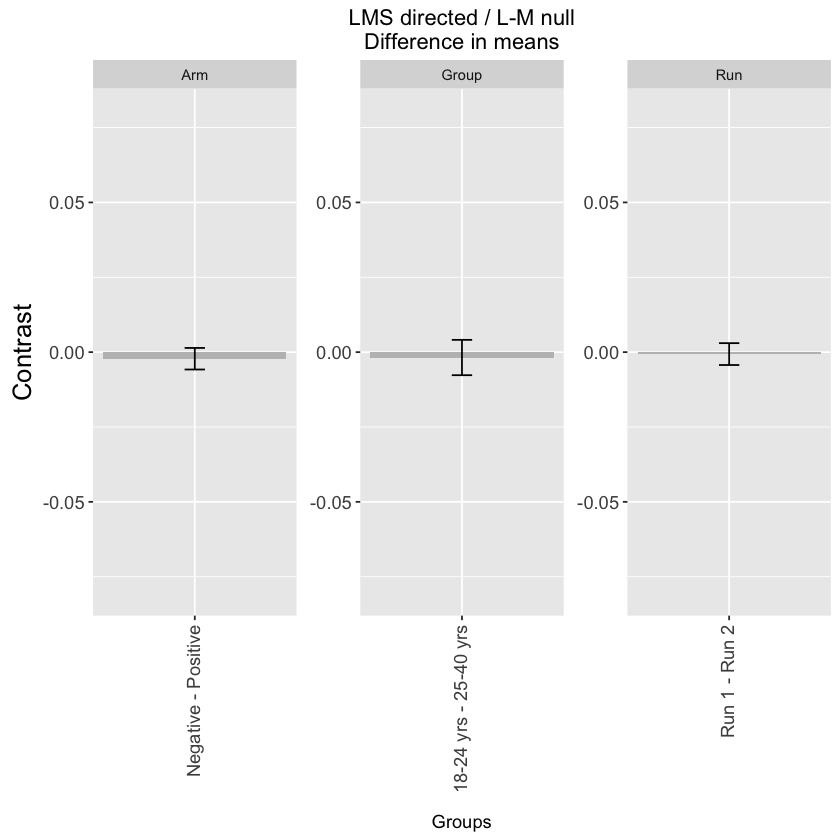

Saving 7 x 7 in image


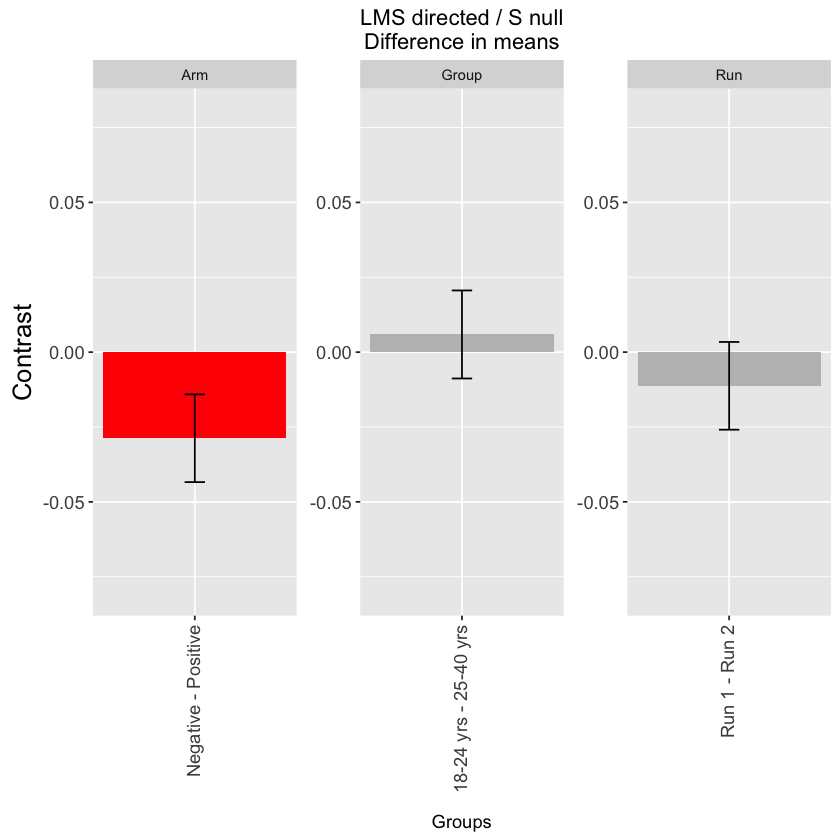

In [6]:
b2 <- plot(difflsmeans(testLMinusM))
b2 + ggtitle(c("LMS directed / L-M null\nDifference in means")) + coord_cartesian(ylim=c(-0.08, 0.08)) + ylab('Contrast') + xlab('Groups') + theme(legend.position="none")
ggsave(file='/Users/mspits/Dropbox (Aguirre-Brainard Lab)/MELA_analysis/NullingPopulationData/xLMSTabulatedAbsorbance/LMS_LMinusMNull_ANOVA_DiffMeans_LMSFromTabulatedAbsorbance.pdf')
b3 <- plot(difflsmeans(testS))
b3 + ggtitle("LMS directed / S null\nDifference in means") + coord_cartesian(ylim=c(-0.08, 0.08)) + ylab('Contrast') + xlab('Groups') + theme(legend.position="none")
ggsave(file='/Users/mspits/Dropbox (Aguirre-Brainard Lab)/MELA_analysis/NullingPopulationData/xLMSTabulatedAbsorbance/LMS_SNull_ANOVA_DiffMeans_LMSFromTabulatedAbsorbance.pdf')